<a href="https://colab.research.google.com/github/srgdesouza/general/blob/main/Blog_Self_Attention_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

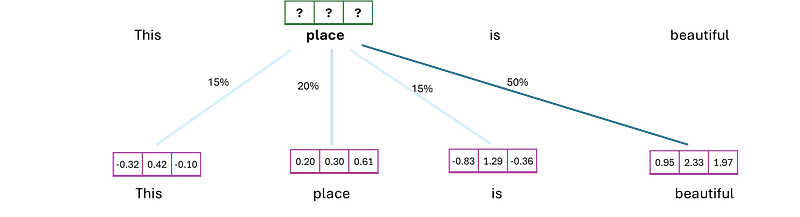

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

word_mapping = {
    'word1': 'This',
    'word2': 'place',
    'word3': 'is',
    'word4': 'beautiful'
}

print(word_mapping)

# Definindo os vetores de entrada word1, word2, x3
word1 = np.array([-0.32 , 0.42, -0.1 ])
word2 = np.array([ 0.2,  0.3 , 0.61])
word3 = np.array([-0.83 , 1.29 ,-0.36])
word4= np.array([ 0.95 , 2.33 , 1.97])
dim=len(word1)
# Calculating similarity scores with respt to word2
score_21 = np.dot(word2, word1)/np.sqrt(dim)
score_22 = np.dot(word2, word2)/np.sqrt(dim)
score_23 = np.dot(word2, word3)/np.sqrt(dim)
score_24 = np.dot(word2, word4)/np.sqrt(dim)

scores= np.array([score_21, score_22, score_23,score_24])
print("Scores with respect to word 2:",  np.round(scores,2))

# Applying softmax to scores
exp_scores = np.exp(np.array([score_21, score_22, score_23,score_24]))
softmax_scores = exp_scores / np.sum(exp_scores)
print("Normalized similarity scores:", softmax_scores)
weights_word2= softmax_scores*100



{'word1': 'This', 'word2': 'place', 'word3': 'is', 'word4': 'beautiful'}
Scores with respect to word 2: [0.   0.29 0.   1.21]
Normalized similarity scores: [0.14975737 0.20000186 0.14979196 0.50044881]


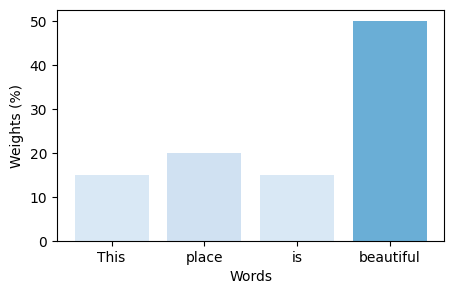

In [3]:


# bar graph of softmax_scores
labels = [word_mapping[label] for label in ['word1', 'word2', 'word3', 'word4']]

# Normalize softmax scores to be between 0 and 1 for color mapping


# Use a blue colormap (e.g., 'Blues') to map normalized scores to colors
colors = plt.cm.Blues(softmax_scores)

plt.figure(figsize=(5, 3))
plt.bar(labels, weights_word2, color=colors)
plt.xlabel('Words')
plt.ylabel('Weights (%)')
#plt.title(f'Softmax Scores with Respect to "{word_mapping["word2"]}"')
plt.show()

In [4]:
# Calculing updated representation of "place"
word2_updated = softmax_scores[0] * word1 + softmax_scores[1] * word2 + softmax_scores[2] * word3 + softmax_scores[3] * word4
print("word2_updated:", np.round(word2_updated,2))



word2_updated: [0.34 1.48 1.04]


##**The top box in the diagram below contains the updated vector we have just calculated.**

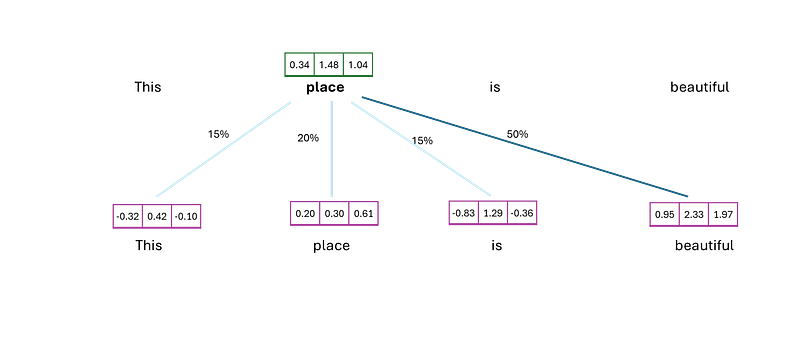

In [5]:
# Calculate scores with respect to word1
score_11 = np.dot(word1, word1) / np.sqrt(dim)
score_12 = np.dot(word1, word2) / np.sqrt(dim)
score_13 = np.dot(word1, word3) / np.sqrt(dim)
score_14 = np.dot(word1, word4) / np.sqrt(dim)

scores_word1 = np.array([score_11, score_12, score_13, score_14])
print("Scores with respect to word 1:", np.round(scores_word1, 4))

# Applying softmax to scores with respect to word1
exp_scores_word1 = np.exp(scores_word1)
softmax_scores_word1 = exp_scores_word1 / np.sum(exp_scores_word1)
weights_word1= softmax_scores_word1*100

print("Normalized sim scores with respect to word 1:", softmax_scores_word1)

Scores with respect to word 1: [0.1667 0.0006 0.4869 0.2757]
Normalized sim scores with respect to word 1: [0.23044251 0.19516396 0.31741176 0.25698177]


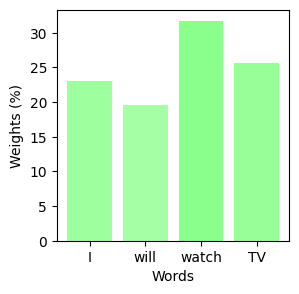

In [20]:
# bar graph of softmax_scores
labels = [word_mapping[label] for label in ['word1', 'word2', 'word3', 'word4']]


# Criar um colormap personalizado com tons exclusivamente amarelos
green_cmap = LinearSegmentedColormap.from_list("pure_green", ["#ccffcc", "#00ff00"])
colors = green_cmap(softmax_scores_word1)

plt.figure(figsize=(3, 3))
plt.bar(labels, weights_word1, color=colors)
plt.xlabel('Words')
plt.ylabel('Weights (%)')
#plt.title(f'Softmax Scores with Respect to "{word_mapping["word1"]}"')
plt.show()

In [7]:
# Calculing updated representation of word1
word1_updated = softmax_scores_word1[0] * word1 + softmax_scores_word1 [1] * word2 + softmax_scores_word1 [2] * word3 + softmax_scores_word1[3] * word4
print("word1_updated:", np.round(word1_updated,2))

word1_updated: [-0.05  1.16  0.49]


In [8]:
np.round(0.488,2)


np.float64(0.49)

In [9]:
# Calculate scores with respect to word3
score_31 = np.dot(word3, word1) / np.sqrt(dim)
score_32 = np.dot(word3, word2) / np.sqrt(dim)
score_33 = np.dot(word3, word3) / np.sqrt(dim)
score_34 = np.dot(word3, word4) / np.sqrt(dim)

scores_word3 = np.array([score_31, score_32, score_33, score_34])
print("Scores with respect to word 3:", np.round(scores_word3, 2))

# Applying softmax to scores with respect to word3
exp_scores_word3 = np.exp(scores_word3)
softmax_scores_word3 = exp_scores_word3 / np.sum(exp_scores_word3)

print("Normalized sim scores with respect to word 3:", softmax_scores_word3)

word3_updated = softmax_scores_word3[0] * word1 + softmax_scores_word3[1] * word2 + softmax_scores_word3[2] * word3 + softmax_scores_word3[3] * word4

Scores with respect to word 3: [0.49 0.   1.43 0.87]
Normalized sim scores with respect to word 3: [0.17670603 0.10867465 0.45526518 0.25935414]


In [10]:
# Calculate scores with respect to word4
score_41 = np.dot(word4, word1) / np.sqrt(dim)
score_42 = np.dot(word4, word2) / np.sqrt(dim)
score_43 = np.dot(word4, word3) / np.sqrt(dim)
score_44 = np.dot(word4, word4) / np.sqrt(dim)

scores_word4 = np.array([score_41, score_42, score_43, score_44])
print("Scores with respect to word 4:", np.round(scores_word4, 2))

# Applying softmax to scores with respect to word4
exp_scores_word4 = np.exp(scores_word4)
softmax_scores_word4 = exp_scores_word4 / np.sum(exp_scores_word4)

print("Normalized scores with respect to word 4:", softmax_scores_word4)

# Calculing updated representation of word4

word4_updated = softmax_scores_word4[0] * word1 + softmax_scores_word4[1] * word2 + softmax_scores_word4[2] * word3 + softmax_scores_word4[3] * word4

print("word3_updated:", np.round(word3_updated, 2))
print("word4_updated:", np.round(word4_updated, 2))



Scores with respect to word 4: [0.28 1.21 0.87 5.9 ]
Normalized scores with respect to word 4: [0.00355452 0.00902091 0.00644383 0.98098074]
word3_updated: [-0.17  1.3   0.4 ]
word4_updated: [0.93 2.3  1.94]


##**The top box in the diagram below contains the updated vectors we have just calculated.**
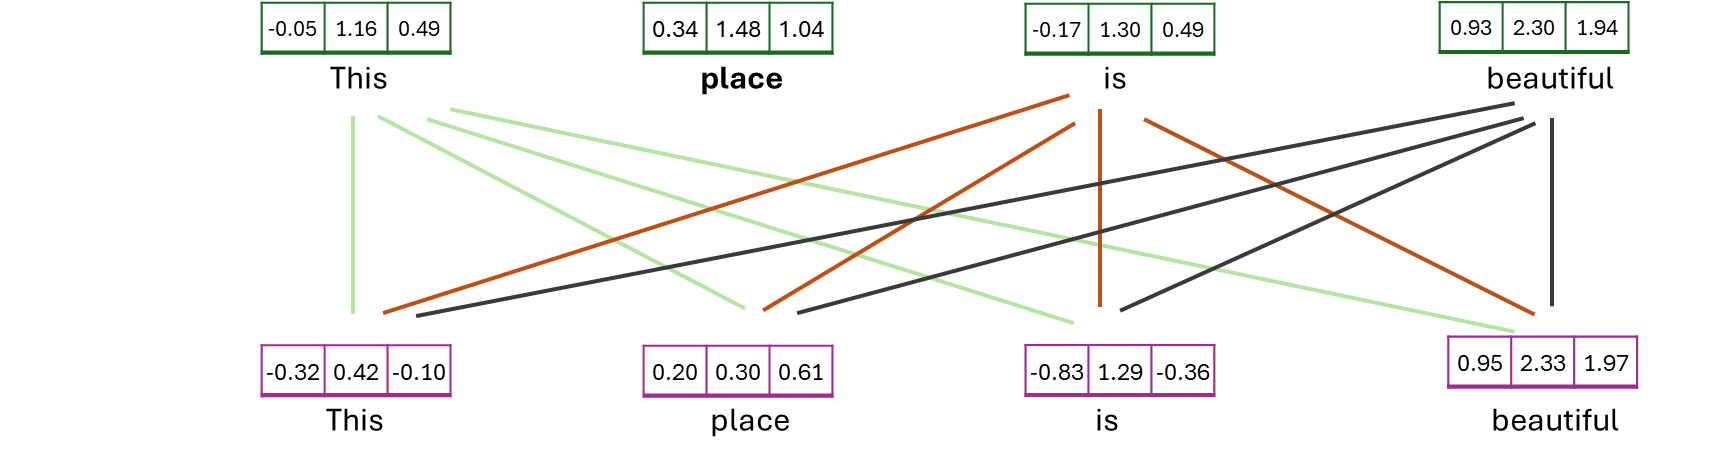


In [11]:
# Stack the attention outputs horizontally
attention_outputs = np.vstack((word1_updated, word2_updated, word3_updated, word4_updated))

print("Stacked attention outputs (horizontally):")
print(np.round(attention_outputs,2))



Stacked attention outputs (horizontally):
[[-0.05  1.16  0.49]
 [ 0.34  1.48  1.04]
 [-0.17  1.3   0.4 ]
 [ 0.93  2.3   1.94]]


## Challenge! Can you do all these calculations **at once** using matrices?

-----------------------------
---------------
#Binary Classification Head






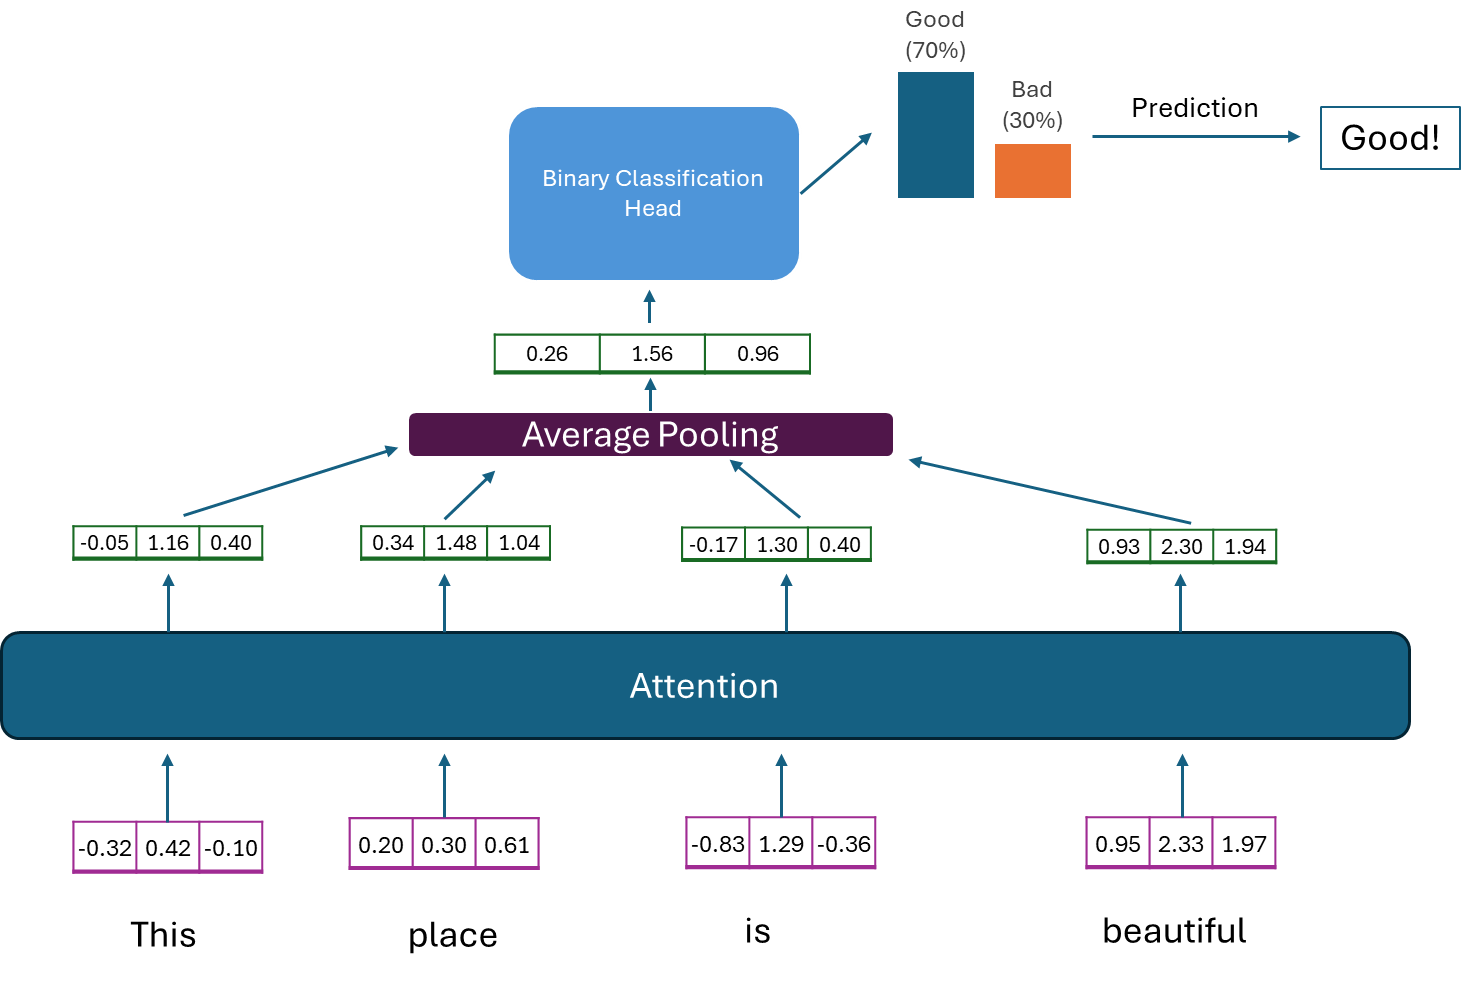

In [12]:
# Calculate the column mean of the attention outputs
average_pool = np.mean(attention_outputs, axis=0)
print("\nAverage pooling of attention outputs:")
print(np.round(average_pool,2))
tetas=  np.array([2.5, -3.4, 5.7])
logit=sum(tetas*average_pool)
logistic=1/(1+np.exp(-logit))
print("\nLogistic regression output:")
print(np.round(logistic,2))

# Predict category based on logistic output
if logistic > 0.5:
    predicted_category = "Good review"
else:
    predicted_category = "Bad review"

print(f"\nPredicted category: {predicted_category}")


Average pooling of attention outputs:
[0.26 1.56 0.96]

Logistic regression output:
0.7

Predicted category: Good review


______________________________________________
##Generative Models


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

word_mapping = {
    'word1': 'I',
    'word2': 'will',
    'word3': 'watch',
    'word4': 'TV'
}

print(word_mapping)

# Definindo os vetores de entrada word1, word2, x3
word1 = np.array([-0.4200 , 0.5200, -0.05 ])
word2 = np.array([-0.9400 , 1.1800 ,0.78])
word3= np.array([ 0.7900 , 2.4400 , 1.13])
word4 = np.array([ 0.2000,  0.3000 , 1.33])
dim=len(word1)
# Calculating similarity scores with respt to word2
score_41 = np.dot(word4, word1)/np.sqrt(dim)
score_42 = np.dot(word4, word2)/np.sqrt(dim)
score_43 = np.dot(word4, word3)/np.sqrt(dim)
score_44 = np.dot(word4, word4)/np.sqrt(dim)

scores= np.array([score_41, score_42, score_43,score_44])
print("Scores with respect to word 2:",  np.round(scores,2))

# Applying softmax às to scores
exp_scores = np.exp(np.array([score_41, score_42, score_43,score_44]))
softmax_scores = exp_scores / np.sum(exp_scores)
print("Normalized similarity scores:", softmax_scores)
weights_word2= (np.round(softmax_scores,2))*100

{'word1': 'I', 'word2': 'will', 'word3': 'watch', 'word4': 'TV'}
Scores with respect to word 2: [0.   0.69 1.38 1.1 ]
Normalized similarity scores: [0.10051253 0.20071586 0.39887513 0.29989649]


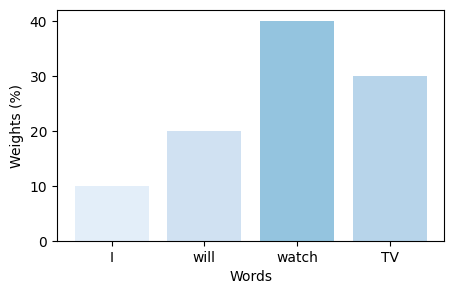

In [14]:
# bar graph of softmax_scores
labels = [word_mapping[label] for label in ['word1', 'word2', 'word3', 'word4']]

# Normalize softmax scores to be between 0 and 1 for color mapping


# Use a blue colormap (e.g., 'Blues') to map normalized scores to colors
colors = plt.cm.Blues(softmax_scores)

plt.figure(figsize=(5, 3))
plt.bar(labels, weights_word2, color=colors)
plt.xlabel('Words')
plt.ylabel('Weights (%)')
#plt.title(f'Softmax Scores with Respect to "{word_mapping["word2"]}"')
plt.show()

In [15]:
# Calculing updated representation of "place"
softmax_scores=np.round(softmax_scores,2)  #to reproduce the approximate results shown in the blog. Inpractice, we should not round these numbers
word4_updated = softmax_scores[0] * word1 + softmax_scores[1] * word2 + softmax_scores[2] * word3 + softmax_scores[3] * word4
print("word4_updated:", np.round(word4_updated,2))


word4_updated: [0.15 1.35 1.  ]


------------------
Language Modeling Head

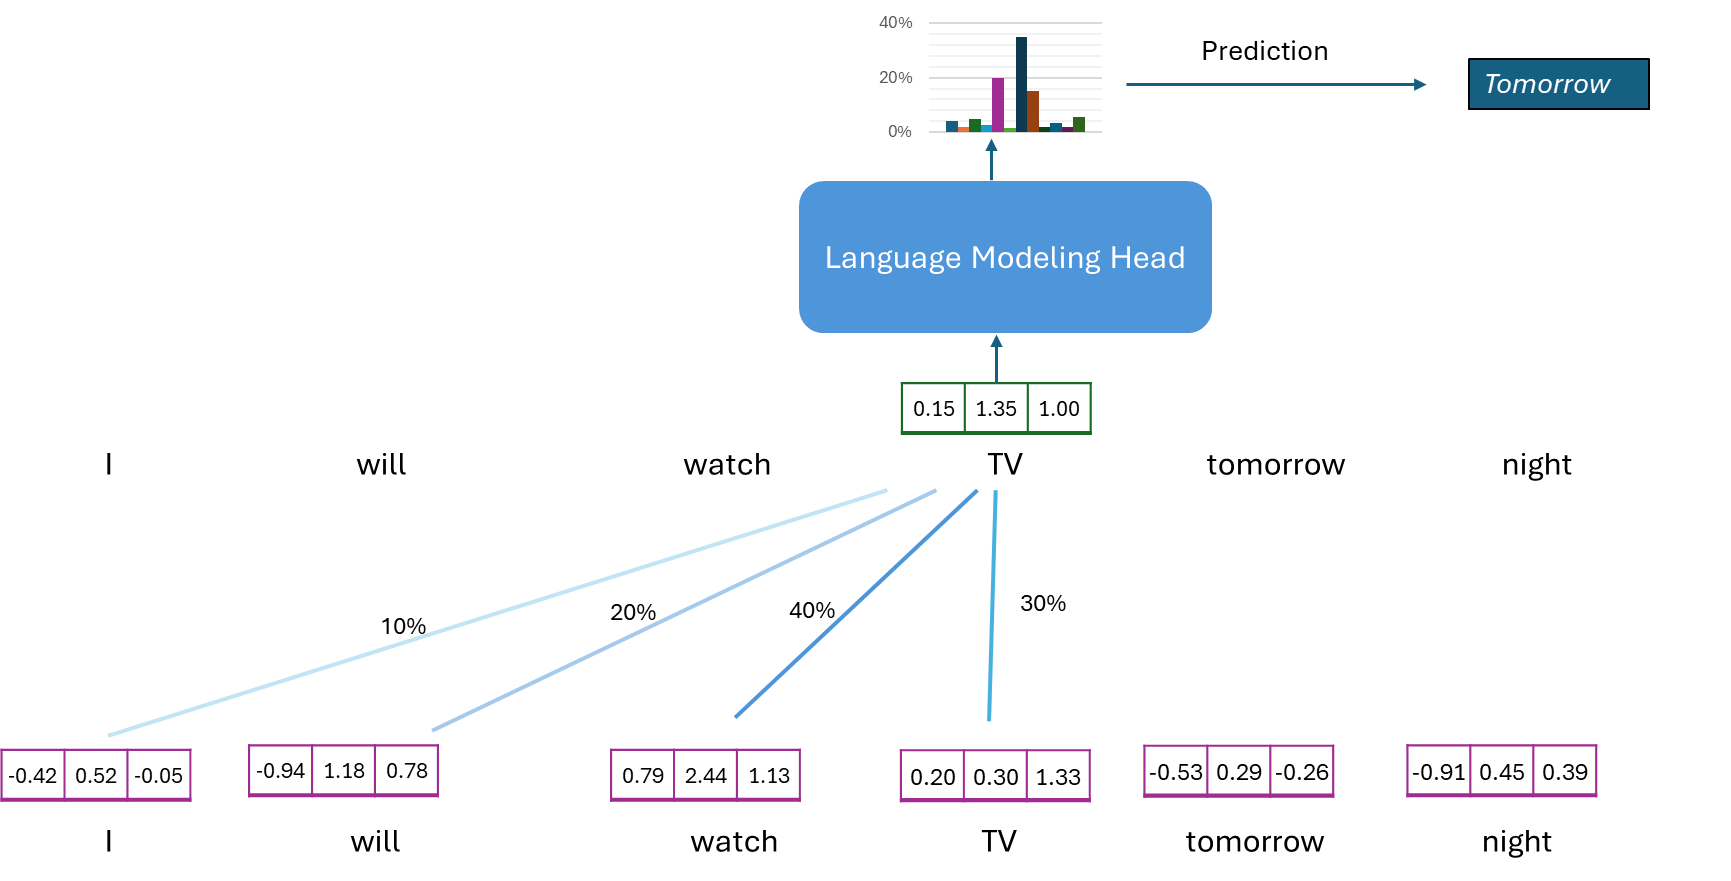

In [16]:
np.random.seed(342) # You can change the seed value here
unembed=0 + 1* np.random.randn(3,9) #We are assuming a small vocabulary of 9 words. Typically this numer is much bigger, 30k or more
logits=word4_updated@unembed
# Applying softmax to scores
exp_scores = np.exp(logits)
softmax_scores = exp_scores / np.sum(exp_scores)
print("Normalized similarity scores:", softmax_scores)


Normalized similarity scores: [0.0166091  0.35418124 0.25884975 0.13545396 0.04579554 0.04603934
 0.10700992 0.00641027 0.02965089]


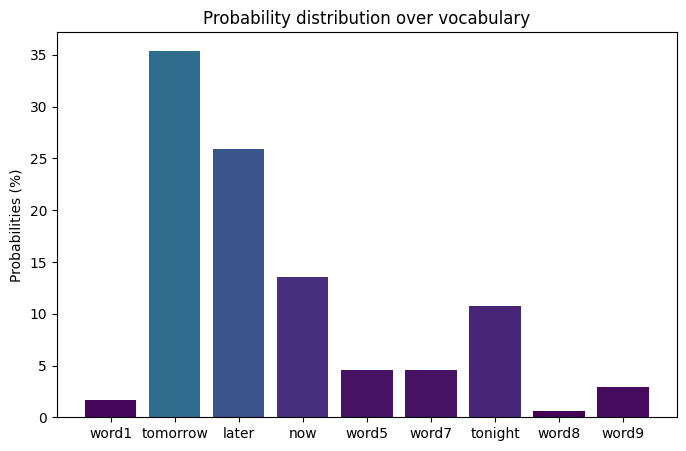

In [17]:

vocab_mapping= {'word1': 'word1',
 'word2': 'tomorrow',
 'word3': 'later',
 'word4': 'now',
 'word5': 'word5',
 'word6': 'word7',
 'word7': 'tonight',
 'word8': 'word8',
 'word9': 'word9'}

# bar graph of softmax_scores

labels = list(vocab_mapping.values())

# Scale softmax scores to 0-100 range
scaled_softmax_scores = softmax_scores * 100

# Create a colormap with shades from Magma
magma_cmap = plt.colormaps['viridis'](np.linspace(0, 1, 256))
magma_cmap = LinearSegmentedColormap.from_list("my_magma", magma_cmap)

# Map scaled softmax scores to colors using the Magma colormap
colors = magma_cmap(scaled_softmax_scores / 100) # Divide by 100 to map back to 0-1 range for colormap

plt.figure(figsize=(8, 5))
plt.bar(labels, scaled_softmax_scores, color=colors)
#plt.xlabel('Words')
plt.ylabel('Probabilities (%)')
plt.title('Probability distribution over vocabulary')
plt.show()